Name(s): Dhruv Arora

# Association Analysis

Association analysis uses machine learning to extract frequent itemsets and strong association rules from large datasets. In this assignment you'll be implementing one of the most commonly used algorithms for association rule mining - the Apriori algorithm.

The dataset (`large_retail.txt`) that we are going to use has been adapted from the [Retail Market Basket Dataset](http://fimi.ua.ac.be/data/retail.pdf). This dataset contains transaction records supplied by a Belgian retail supermarket store. Each line in the file represents a separate transaction with the item ids separated by space. The dataset has 3000 transactions and 99 different item ids.

You are also provided with a smaller dataset (`small_retail.txt`) with 9 transactions and 5 different item ids along with the solutions. You can test and debug your implementation on this smaller dataset.

## Apriori Algorithm from scratch

The Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. In this part, you'll be implementing this algorithm for generating the itemsets that occur enough times to meet the `min_sup` threshold.

**Implementation Hint:**

- Use the `frozenset` data structure in Python, which is similar to `set` in functionality, to represent the itemsets, because `frozenset` is an immutable (hashable) data structure. You can maintain a dictionary that maps from the itemset (a `frozenset`) to its support count.

In [51]:
# Standard imports (you can add additional headers if you wish)
import numpy as np

In [52]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()
        data = [[int(x) for x in line.rstrip().split()] for line in content]
    return data

In [53]:
# Read in the small_retail dataset
small_dataset = load_dataset('small_retail.txt')
small_dataset

[[1, 2, 5],
 [2, 4],
 [2, 3],
 [1, 2, 4],
 [1, 3],
 [2, 3],
 [1, 3],
 [1, 2, 3, 5],
 [1, 2, 3]]

Q1. Implement the function `create_1_itemsets` that takes as input the entire dataset and returns a list of all the candidate 1-itemsets. For example, for `small_retail.txt` it should return:
~~~
[frozenset({1}),
 frozenset({2}),
 frozenset({3}),
 frozenset({4}),
 frozenset({5})]
 ~~~
 Please don't hardcode the item ids, your code should support item ids that are non-sequential.

In [54]:
def get_all_vals_in_dataset(dataset):
    all_vals = set()
    for datapoint in dataset:
        for item in datapoint:
            if item not in all_vals:
                all_vals.add(item)
    
    return sorted(list(all_vals))

def create_1_itemsets(dataset):
    all_vals = get_all_vals_in_dataset(dataset)
    return [frozenset([val]) for val in all_vals]

Q2. Implement function `filter_candidates` that takes as input the candidate itemsets, the dataset, and the minumum support count `min_sup`, and filters out candidates that don't meet the support threshold.

Return a list of all the itemsets that meet `min_sup` (as a list of frozensets) and the support count information for all of them (as a `dict`).

In [55]:
def filter_candidates(candidates, dataset, min_sup):
    retlist = []
    support_data = {}
    # your code goes here
    for datapoint in dataset:
        datapoint = set(datapoint)
        for c in candidates:
            if c.issubset(datapoint):
                if c not in support_data:
                    support_data[c] = 0

                support_data[c] += 1

    retlist = [c for c in candidates if c in support_data and support_data[c] >= min_sup]
    new_sup = {}
    for c in retlist:
        new_sup[c] = support_data[c]
    return retlist, new_sup

Q3. Implement the function `generate_next_itemsets` that takes in frequent itemsets of size `k` and generates candidate itemsets of size `k + 1`.

Use either the F(k-1) x F(k-1) or the F(k-1) x F(1) candidate generation method, then **filter the candidate list based on the apriori principle before returning it.**

In [56]:
import itertools

def generate_next_itemsets(freq_sets):
    retlist = []
    # your code goes here
    freq_sets = [sorted(list(f)) for f in freq_sets]

    for i in range(len(freq_sets)):
        for j in range(i, len(freq_sets)):
            if i == j:
                continue
            curr = freq_sets[i]
            other = freq_sets[j]
            # can assume last vals are diff since prev if would've activated
            if curr[:-1] == other[:-1]:
                # apriori filtering
                new = curr + [other[-1]]
                combos = itertools.combinations(new, len(curr))
                valid = True
                for combo in combos:
                    if list(combo) not in freq_sets:
                        valid = False
                        break

                if valid:
                    retlist.append(frozenset(curr + [other[-1]]))
    
    return retlist

Q4. Implement the function `apriori_freq_itemsets` that takes the entire dataset as input and returns all the frequent itemsets that meet `min_sup`.

In [57]:
def apriori_freq_itemsets(dataset, minsup):
    retlist = []
    support_data = {}
    # your code goes here
    candidates = create_1_itemsets(dataset)
    while len(candidates) > 0:
        freq, sup = filter_candidates(candidates, dataset, minsup)
        candidates = generate_next_itemsets(freq)
        retlist.extend(freq)
        for key in sup:
            support_data[key] = sup[key]
    return retlist, support_data

Q5. Display the frequent item sets in the form of a table along with their `support` (as a fraction: support count over number of transactions) for the `large_retail.txt` dataset **with a min support count of 300**.

Sample Table Format (tab separated table)

~~~
Sup     Freq Itemset
0.67	[1]
0.44	[1, 2]
(and so on)
...
...
~~~

`support(itemset) = support_count(itemset) / num_total_transactions`.

The `support` and the itemset should be separated by a tab (`'\t'`).

Note that the `support` should be rounded to the nearest 2 decimal places (use `round(sup, 2)`). If a support_fraction only contains 1 decimal place (for example, 0.1), you do not need to add a 0 to the end of it (leaving it as 0.1 is fine).

The itemsets should also be in a sorted order where smaller itemsets should come before larger itemsets and itemsets of the same size should be sorted amongst themselves.

For eg. 
~~~~
[1, 2] should come before [1, 2, 3]
[1, 2, 3] should come before [1, 2, 4]
[1, 2, 3] should come before [1, 4, 5]
[1, 2, 3] should come before [2, 3, 4]
~~~~

Note that **this order is very important for grading!** 

The output also shouldn't contain any duplicates. 

The sample output for the `small_retail.txt` dataset with `min_sup` set to 2 is:

~~~~
Sup     Freq Itemset
0.67	[1]
0.78	[2]
0.67	[3]
0.22	[4]
0.22	[5]
0.44	[1, 2]
0.44	[1, 3]
0.22	[1, 5]
0.44	[2, 3]
0.22	[2, 4]
0.22	[2, 5]
0.22	[1, 2, 3]
0.22	[1, 2, 5]
~~~~


In [58]:
# your code goes here
large_dataset = load_dataset('large_retail.txt')
dataset = large_dataset

freq_sets, support_count = apriori_freq_itemsets(dataset, 300)
total = len(dataset)

print('Sup\tFreq Itemset')
for freq in freq_sets:
    print('%s\t%s' % (round(support_count[freq] / total, 2), sorted(list(freq))))


Sup	Freq Itemset
0.1	[31]
0.14	[32]
0.11	[36]
0.26	[38]
0.53	[39]
0.22	[41]
0.47	[48]
0.11	[60]
0.11	[65]
0.11	[89]
0.14	[32, 39]
0.15	[38, 39]
0.13	[38, 48]
0.14	[39, 41]
0.33	[39, 48]
0.18	[41, 48]
0.14	[39, 41, 48]


Q6. Find the closed frequent item sets. Display results for the `large_retail.txt` dataset in the same format as specified in Q5.

The results for the `small_retail` dataset are as follows:

~~~~
Sup	Freq Itemset
0.0	[1]
0.0	[2]
0.0	[3]
0.0	[1, 2]
0.0	[1, 3]
0.0	[2, 3]
0.0	[2, 4]
0.0	[1, 2, 3]
0.0	[1, 2, 5]
~~~~

In [59]:
def closed_freq_itemsets(support_data):
    # your code goes here
    print('Sup\tFreq Itemset')
    # innermost sort in generator sorts the values within the itemset
    # the sort in the middle sorts by first value in the itemset
    # the outermost sort sorts by length
    keys = sorted(sorted([sorted(list(s)) for s in support_data]), key = lambda x: len(x))
    for i in range(len(keys)):
        valid = True
        for j in range(i + 1, len(keys)):
            if False not in [k in keys[j] for k in keys[i]] and support_data[frozenset(keys[i])] == support_data[frozenset(keys[j])]:
                valid = False
                break

        if valid:
            print('0.0\t%s' % keys[i])

closed_freq_itemsets(support_count)

Sup	Freq Itemset
0.0	[31]
0.0	[36]
0.0	[38]
0.0	[39]
0.0	[41]
0.0	[48]
0.0	[60]
0.0	[65]
0.0	[89]
0.0	[32, 39]
0.0	[38, 39]
0.0	[38, 48]
0.0	[39, 48]
0.0	[41, 48]
0.0	[39, 41, 48]


## Extra Credit (+5 points)

Q7. Now, generate the strong rules from the frequent itemsets. Given a dictionary of frequent itemsets and their supports, generate all the rules having confidence above some provided `min_conf` threshold. Display the rules in the form of a table.

Sample table format (tab separated table):

~~~
Sup     Conf    Rule
0.44	0.67	[1] -> [2]
0.22	1.0	 [5] -> [1, 2]
0.22	1.0	 [2, 5] -> [1]
(and so on)
...
...
~~~

Rule confidence should be rounded to the nearest 2 decimal places (use `round(conf, 2)`). This table should also be tab (`'\t'`) separated. The rules should be displayed in a sorted order. If a rule is given as `LHS -> RHS` then the rules for which `len(LHS)` is lesser should appear first. If the `len(LHS)` is equal for two rules then rules for which `len(RHS)` is lesser should appear first. If both `len(LHS)` and `len(RHS)` is equal then the rules should be sorted based on LHS first and then based on RHS.

~~~~
Note:
LHS (Left Hand Side)
RHS (Right Hand Side)
~~~~

For eg.
~~~~
[3] -> [2] should come before [1, 3] -> [4]
[4] -> [2] should come before [2] -> [3, 4]
[1, 3] -> [2] should come before [1, 5] -> [2]
[1, 2] -> [3] should come before [1, 2] -> [5]
~~~~

Note that **this order is important for grading**. 

The sample output for the `small_retail` dataset with `min_conf = 0.5` is:

~~~~
Sup	Conf	Rule
0.44	0.67	[1] -> [2]
0.44	0.67	[1] -> [3]
0.44	0.57	[2] -> [1]
0.44	0.57	[2] -> [3]
0.44	0.67	[3] -> [1]
0.44	0.67	[3] -> [2]
0.22	1.0	[4] -> [2]
0.22	1.0	[5] -> [1]
0.22	1.0	[5] -> [2]
0.22	1.0	[5] -> [1, 2]
0.22	0.5	[1, 2] -> [3]
0.22	0.5	[1, 2] -> [5]
0.22	0.5	[1, 3] -> [2]
0.22	1.0	[1, 5] -> [2]
0.22	0.5	[2, 3] -> [1]
0.22	1.0	[2, 5] -> [1]
~~~~

In [60]:
def generate_rules(support_data, minconf, len_dataset):
    # rule format: (LHS, RHS)
    # so [1, 2] -> [3] becomes ([1, 2], [3])
    rules = []

    # collect all of the freq item sets in sorted order
    # copied this code from prev method
    freq_itemsets = sorted(sorted([sorted(list(s)) for s in support_data]), key = lambda x: len(x))
    # # use brute force algo: easier to code and easier to ensure output order
    # for freq in freq_itemsets:
    #     # try all possible sizes of LHS
    #     for LHS_size in range(1, len(freq)):

    print('Sup\tConf\tRule')

    # apriori rule gen algo
    for freq in freq_itemsets:
        if len(freq) < 2:
            continue

        # create initial candidates
        RHS_candidates = [[x] for x in freq][::-1]
        LHS_candidates = [[x for x in freq if x not in RHS_cand] for RHS_cand in RHS_candidates]

        rule_candidates = list(zip(LHS_candidates, RHS_candidates))
        while len(rule_candidates) > 0:
            # try each cand in the current batch
            valid_rules = []
            for cand in rule_candidates:
                total = support_data[frozenset(freq)]
                conf = total / support_data[frozenset(cand[0])]
                
                if conf >= minconf:
                    # (sup, conf, rule)
                    rules.append((total / len_dataset, conf, cand))
                    valid_rules.append(cand)

            rule_candidates = []
            # all of the rules have the same len(LHS) so only check one
            if len(valid_rules) > 0 and len(valid_rules[0][0]) > 1:
                # create new rule candidates
                for i in range(len(valid_rules)):
                    for j in range(i + 1, len(valid_rules)):
                        RHS_cand = [x for x in freq if x in valid_rules[j][1] or x in valid_rules[i][1]]
                        LHS_cand = [x for x in freq if x not in RHS_cand]
                        rule_candidates.append((LHS_cand, RHS_cand))

    rules.sort(key = lambda x: x[2][0])
    rules.sort(key = lambda x: len(x[2][1]))
    rules.sort(key = lambda x: len(x[2][0]))

    for sup, conf, rule in rules:
        print('%s\t%s\t%s -> %s' % (round(sup, 2), round(conf, 2), *rule))

generate_rules(support_count, 0.5, len(dataset))

Sup	Conf	Rule
0.14	1.0	[32] -> [39]
0.15	0.58	[38] -> [39]
0.33	0.62	[39] -> [48]
0.14	0.64	[41] -> [39]
0.18	0.8	[41] -> [48]
0.33	0.7	[48] -> [39]
0.14	0.64	[41] -> [39, 48]
0.14	1.0	[39, 41] -> [48]
0.14	0.8	[41, 48] -> [39]


## Part 2 - Association Analysis using MLXtend

## Installation
`scikit-learn` does not provide any functionality for association rule mining so for this assignment you will be using the `MLxtend` library. The documentation for this library is available [here](http://rasbt.github.io/mlxtend/).

You will need to install the `MLxtend` library. There are several ways of doing this; you can follow the instructions below, or see the setup guide  [here](http://rasbt.github.io/mlxtend/installation/).


### Conda

If you downladed Anaconda in order to get Jupyter Notebooks (which is the most common way to get Jupyter Notebooks), then you will want to install `MLxtend` using Conda. 

Open a command prompt / terminal window and type:

`conda install mlxtend --channel conda-forge`

### PyPi

You can also install via pip. 
Note: If you are running Jupyter notebooks through an Anaconda install, then pip may not place the `MLxtend` libraries in the correct place for use in Jupyter (which is why you should use Conda instead of pip, if you downloaded Anaconda).

Open a command prompt / terminal window and type:

`pip3 install mlxtend`

### Google Colab

If you are using Google Colab, you can install MLXtend via a pip install command with an exclamation point in front of it, in one of your notebook cells. The exclamation points allows you to put shell commands inside of Colab. 

In a cell in your Colab notebook, type:

`!pip install mlxtend`


## Dataset
For the second part of this assignment, the data we'll use comes from a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 2016-10-30 to 2017-04-09.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products purchased.

In this part, you'll be running the Apriori algorithm from the MLxtend library to generate the itemsets that occur more than the `min_sup` threshold. Based on these frequent itemsets, you'll find association rules that have confidence above the `min_conf` threshold.

In [76]:
# Standard imports (you can add additional headers if you wish)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, association_rules

In [62]:
%matplotlib inline

In [63]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [117]:
dataset = load_dataset('BreadBasket_DMS.csv')

# ** NOTE: dataset is a 2D list (not a dataframe!) **

print("Num transactions:", len(dataset))
#Print the first 10 transactions
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

Q8. Data Cleaning: Many transactions in the dataset include the item "NONE." First, find and remove all the "NONE" items from the dataset. There are some transactions that only contain "NONE," so removing "NONE" will leave some transactions as empty lists. Remove all the empty lists as well. 

Once you have removed the NONEs, find the top 10 best-selling items in the bakery. Create a bar chart to display the total number of transactions for each of the top 10 selling items. Sort the bar chart by frequency (the top most sold item first, down to the 10th most sold item).

Total items before cleaning: 21293
# transactions before cleaning: 9531

Total items after cleaning: 20507
# transactions after cleaning: 9465


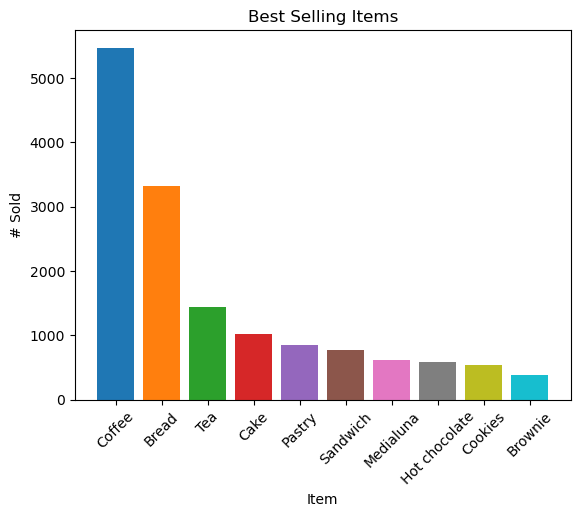

In [162]:
# your code goes here
print('Total items before cleaning:', sum([len(t) for t in dataset]))
print('# transactions before cleaning:', len(dataset))

cleaned_dataset = [[item for item in transaction if item != 'NONE'] for transaction in dataset]
cleaned_dataset = [t for t in cleaned_dataset if len(t) > 0]

print('\nTotal items after cleaning:', sum([len(t) for t in cleaned_dataset]))
print('# transactions after cleaning:', len(cleaned_dataset))

# count each item
counts = {}
for transaction in cleaned_dataset:
    for item in transaction:
        if item not in counts:
            counts[item] = 0
        counts[item] += 1
        
best_selling = sorted([(x, counts[x]) for x in counts], key = lambda x: x[1], reverse=True)
best_selling = best_selling[:10]

# create a bar for each item
for item in best_selling:
    plt.bar(*item)

# rotate labels
plt.xticks(rotation=45)
    
plt.xlabel('Item')
plt.ylabel('# Sold')
plt.title('Best Selling Items')

plt.show()


Q9. 

a.) Using `mlxtend.preprocessing.TransactionEncoder`, transform `dataset` into an array format suitable for the `mlxtend` library. You will need to call `fit` then `transform`. 

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction. If the first transaction contained ['Crepe', 'Jam'], this would correspond to the first row in the encoded table. 

<img src="table.png">

Print the `shape` of the resulting encoded numpy array.

b.) `TransactionEncoder` also has a function `inverse_transform` that allows you to tranform one-hot encoded transactions back to the item labels. Try it out on the first 5 transactions and display the items in the first 5 transactions.

In [66]:
# your code goes here
print('a)')
te = TransactionEncoder()
te.fit(cleaned_dataset)
encoded = te.transform(cleaned_dataset)
print(encoded.shape)

print('b)')
print(te.inverse_transform(encoded[:5]))

a)
(9531, 94)
b)
[['Bread'], ['Scandinavian'], ['Cookies', 'Hot chocolate', 'Jam'], ['Muffin'], ['Bread', 'Coffee', 'Pastry']]


Q10. Convert the encoded numpy array from Q4 part a into a pandas dataframe. Use the `TransactionEncoder`'s `.columns_` attribute as the column headers. Print the head of the resulting dataframe. 

In [67]:
# your code goes here
df = pd.DataFrame(encoded, columns=te.columns_)
df.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Q11. Use the `mlxtend.frequent_patterns.apriori` to generate the frequent itemsets with minimum support of 1% (0.01). Display these itemsets along with their support values.

In [169]:
# your code goes here
apriori_results = apriori(df, min_support=.01, use_colnames=True)
apriori_results

,support,itemsets
0,0.036093,(Alfajores)
1,0.015948,(Baguette)
2,0.324940,(Bread)
3,0.039765,(Brownie)
4,0.103137,(Cake)
5,0.012905,(Chicken Stew)
6,0.475081,(Coffee)
7,0.019305,(Coke)
8,0.054034,(Cookies)
9,0.038926,(Farm House)


Q12. Use `mlxtend.frequent_patterns.fpmax` to find and display all of the maximal frequent itemsets along with their support values. 

In [170]:
# your code goes here
fpmax_results = fpmax(df, min_support=.01, use_colnames=True)
fpmax_results

,support,itemsets
0,0.010387,(Salad)
1,0.010492,(Hearty & Seasonal)
2,0.012905,(Chicken Stew)
3,0.013115,(Jammie Dodgers)
4,0.014059,(Mineral water)
5,0.014899,(Jam)
6,0.014899,(Fudge)
7,0.015318,(Tiffin)
8,0.015948,(Baguette)
9,0.010807,"(Spanish Brunch, Coffee)"


Q13. Use `mlxtend.frequent_patterns.association_rules` to calculate rules with a confidence level of 0.25 for the frequent itemsets you generated in Q11.

In [166]:
# your code goes here
rules = association_rules(apriori_results, metric='confidence', min_threshold=.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Bread),0.036093,0.324940,0.010282,0.284884,0.876728,-0.001446,0.943987,-0.127300
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861,0.125899
2,(Brownie),(Bread),0.039765,0.324940,0.010702,0.269129,0.828244,-0.002219,0.923639,-0.177606
3,(Bread),(Coffee),0.324940,0.475081,0.089393,0.275105,0.579069,-0.064980,0.724131,-0.518492
4,(Cookies),(Bread),0.054034,0.324940,0.014374,0.266019,0.818673,-0.003184,0.919725,-0.189719
5,(Medialuna),(Bread),0.061379,0.324940,0.016787,0.273504,0.841708,-0.003157,0.929201,-0.166915
6,(Pastry),(Bread),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731,0.044272
7,(Brownie),(Coffee),0.039765,0.475081,0.019515,0.490765,1.033013,0.000624,1.030799,0.033281
8,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667,0.109767
9,(Cookies),(Coffee),0.054034,0.475081,0.028014,0.518447,1.091280,0.002343,1.090053,0.088422


Q14. An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful. 

Generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying min_conf between 0 and 1 with increments of 0.1. Notice what happens when you increase the confidence level.

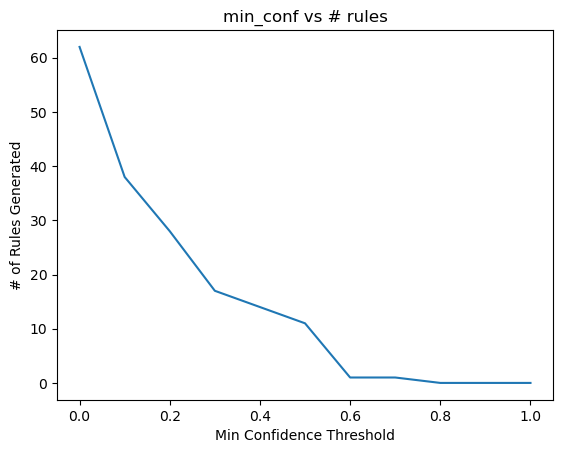

In [187]:
# your code goes here
freq_itemsets = apriori(df, min_support=.01, use_colnames=True)

x = [x / 10 for x in range(0, 11)]
y = [len(association_rules(freq_itemsets, min_threshold=threshold)) for threshold in x]

plt.plot(x, y)

plt.title('min_conf vs # rules')
plt.xlabel('Min Confidence Threshold')
plt.ylabel('# of Rules Generated')
plt.show()

Q15. What value would you choose for the minimum confidence threshold based on the previous plot? Explain why as a comment. 

Display the rules generated for the your chosen value. Take a look at the generated rules. Are they interesting? As a comment, explain why or why not.

In [224]:
# I would pick .3 as my threshold since the graph shows that increasing 
# confidence any more only removes a few rules. After looking at the rules
# generated from a min_threshold of .3, I noticed that *almost* all of them
# relate to Coffee. I think this is because the dataset has so much Coffee
# being purchased in so many transactions that it ends up showing correlation
# with many other items. However, some of these do actually make sense, specifically
# the ones with <some form of breakfast food> --> Coffee. Likely because many
# people drink coffee alongside their breakfast.


# your code goes here
rules = association_rules(freq_itemsets, min_threshold=0.3)

# we want most confident rules first
rules.sort_values('confidence', ascending=False, inplace=True)

LHS = [list(a) for a in rules['antecedents']]
RHS = [list(c) for c in rules['consequents']]

for i in range(len(rules)):
    print('%s -> %s' % (LHS[i], RHS[i]))

['Toast'] -> ['Coffee']
['Spanish Brunch'] -> ['Coffee']
['Medialuna'] -> ['Coffee']
['Pastry'] -> ['Coffee']
['Alfajores'] -> ['Coffee']
['Juice'] -> ['Coffee']
['Sandwich'] -> ['Coffee']
['Cake'] -> ['Coffee']
['Scone'] -> ['Coffee']
['Cookies'] -> ['Coffee']
['Hot chocolate'] -> ['Coffee']
['Brownie'] -> ['Coffee']
['Muffin'] -> ['Coffee']
['Soup'] -> ['Coffee']
['Bread', 'Pastry'] -> ['Coffee']
['Tea'] -> ['Coffee']
['Pastry'] -> ['Bread']
